In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['default'])


In [36]:
df = pd.read_csv('gym.csv')

In [37]:
df['Date'] = df['Day'] + ' '+ df['Hour']

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df['hour_main'] =  df['Date'].dt.hour

In [40]:
exercise_names = list(df.Exercise_Name.unique())

In [41]:
len(exercise_names)

45

In [42]:
for x in ['Plank','Side Plank','Russian Twist','Elliptical Machine','V Crunch','Heel Touch & Mekik ',
                                    'Reaching Crunch ','Leg Raise','Running (Treadmill)','Warm Up']:
    exercise_names.remove(x) 

In [43]:
len(exercise_names)

35

In [44]:
df

,Day,Hour,Duration,Set_Order,Exercise_Name,Weight,Reps,RPE,Seconds,Notes,Date,hour_main
0,2022-08-09,22:46:40,1h 8m,1,Shoulder Press (Plate Loaded),40.0,12,NaN,0,NaN,2022-08-09 22:46:40,22
1,2022-08-09,22:46:40,1h 8m,2,Shoulder Press (Plate Loaded),40.0,10,NaN,0,NaN,2022-08-09 22:46:40,22
2,2022-08-09,22:46:40,1h 8m,3,Shoulder Press (Plate Loaded),50.0,8,NaN,0,NaN,2022-08-09 22:46:40,22
3,2022-08-09,22:46:40,1h 8m,4,Shoulder Press (Plate Loaded),50.0,8,NaN,0,NaN,2022-08-09 22:46:40,22
4,2022-08-09,22:46:40,1h 8m,1,Lateral Raise (Machine),7.5,12,NaN,0,NaN,2022-08-09 22:46:40,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2022-12-20,22:19:54,1h 6m,2,Seated Leg Curl (Machine),57.0,12,NaN,0,NaN,2022-12-20 22:19:54,22
1358,2022-12-20,22:19:54,1h 6m,3,Seated Leg Curl (Machine),57.0,12,8.0,0,NaN,2022-12-20 22:19:54,22
1359,2022-12-20,22:19:54,1h 6m,1,Leg Extension (Machine),90.0,9,10.0,0,NaN,2022-12-20 22:19:54,22
1360,2022-12-20,22:19:54,1h 6m,2,Leg Extension (Machine),84.0,12,9.5,0,NaN,2022-12-20 22:19:54,22


In [45]:
df[df.Exercise_Name.isin(['Shoulder Press (Plate Loaded)'])].head()

,Day,Hour,Duration,Set_Order,Exercise_Name,Weight,Reps,RPE,Seconds,Notes,Date,hour_main
0,2022-08-09,22:46:40,1h 8m,1,Shoulder Press (Plate Loaded),40.0,12,NaN,0,NaN,2022-08-09 22:46:40,22
1,2022-08-09,22:46:40,1h 8m,2,Shoulder Press (Plate Loaded),40.0,10,NaN,0,NaN,2022-08-09 22:46:40,22
2,2022-08-09,22:46:40,1h 8m,3,Shoulder Press (Plate Loaded),50.0,8,NaN,0,NaN,2022-08-09 22:46:40,22
3,2022-08-09,22:46:40,1h 8m,4,Shoulder Press (Plate Loaded),50.0,8,NaN,0,NaN,2022-08-09 22:46:40,22
56,2022-08-12,17:02:25,1h 1m,1,Shoulder Press (Plate Loaded),50.0,12,NaN,0,NaN,2022-08-12 17:02:25,17


In [46]:
df[df.Exercise_Name.isin(['Shoulder Press (Plate Loaded)'])].groupby(['Weight','Set_Order']).agg({'Reps':['mean'],'RPE':['mean']})

Reps        RPE
                       mean       mean
Weight Set_Order                      
30.0   1          15.000000        NaN
35.0   2          10.000000   8.000000
       3          10.000000   8.500000
36.0   1          12.000000        NaN
40.0   1          12.000000   7.500000
       2          10.000000        NaN
       4           8.000000   8.500000
43.0   2          10.000000  10.000000
       3          10.000000  10.000000
50.0   1          12.000000        NaN
       2          10.000000   8.500000
       3           8.000000   8.500000
       4           7.400000   9.833333
60.0   2           9.000000   9.250000
       3           6.333333   9.666667
       4           7.750000   9.625000
65.0   4           6.000000  10.000000
70.0   3           6.000000  10.000000

In [47]:
df['month'] = df.Date.dt.month

Text(0.5, 0, 'Trials')

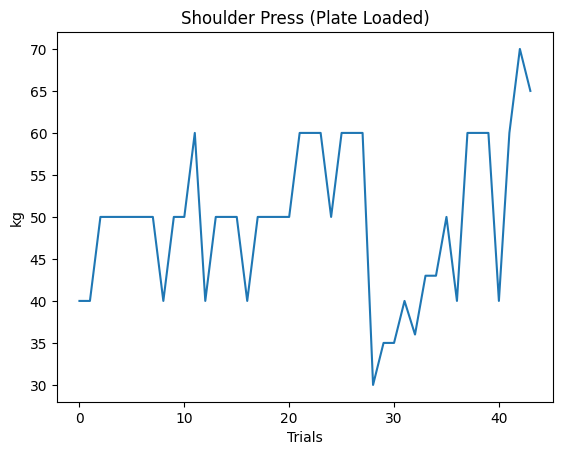

In [48]:
exer_name = ['Shoulder Press (Plate Loaded)']
df[df.Exercise_Name.isin(exer_name)].Weight.reset_index(drop=True).plot(title=exer_name[0])
plt.ylabel('kg')
plt.xlabel('Trials')

Text(0.5, 0, ' ')

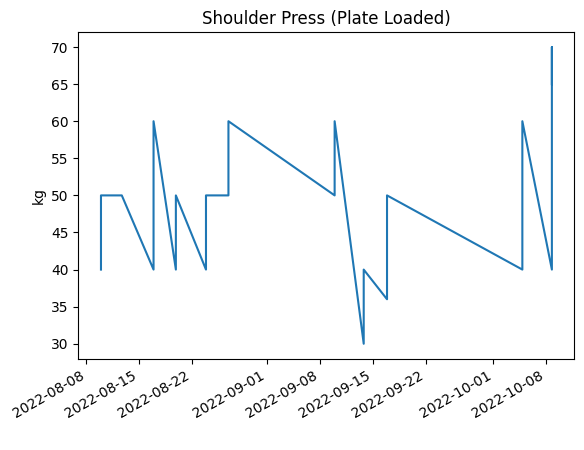

In [49]:
exer_name = ['Shoulder Press (Plate Loaded)']
df[df.Exercise_Name.isin(exer_name)].set_index('Date').Weight.plot(title=exer_name[0])
plt.ylabel('kg')
plt.xlabel(' ')

Text(0.5, 1.0, 'Shoulder Press (Plate Loaded)')

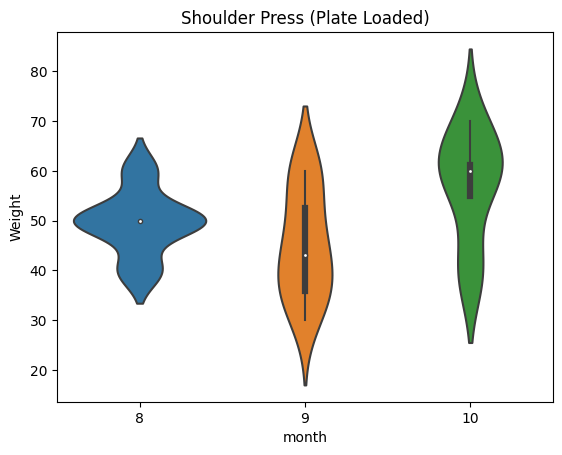

In [50]:
sns.violinplot(data=df[df.Exercise_Name.isin(exer_name)],x='month',y='Weight')
plt.title(exer_name[0])

In [51]:
upper_body = [
 'Shoulder Press (Plate Loaded)',
 'Lateral Raise (Machine)',
 'Reverse Fly (Dumbbell)',
 'Pullover (Dumbbell)',
 'Chest Fly (Dumbbell)',
 'Chest Press (Machine)',
 'Lat Pulldown (Cable)',
 'Reverse Grip Lat Pulldown',
 'Bent Over Row (Barbell)',
 'Iso-Lateral Row (Machine)',
 'Straight Arm Pulldown',
 'Dumpbell Bentover Rear Lat Raise',
 'Bench Press (Barbell)',
 'Cable Crossover',
 'Incline Chest Press (Machine)',
 'Shoulder Press (Machine)',
 'Lateral Raise (Dumbbell)',
 'Incline Bench Press (Barbell)',
]

shoulder = [
    'Lateral Raise (Dumbbell)',
    'Shoulder Press (Plate Loaded)',
    'Lateral Raise (Machine)',
 'Dumpbell Bentover Rear Lat Raise',
 'Lateral Raise (Dumbbell)',
]

chest = [
     'Pullover (Dumbbell)',
 'Chest Fly (Dumbbell)',
 'Chest Press (Machine)',
 'Bench Press (Barbell)',
 'Cable Crossover',
 'Incline Chest Press (Machine)',
 'Incline Bench Press (Barbell)',
]

back = [
     'Lateral Raise (Machine)',
     'Reverse Fly (Dumbbell)',
     'Lat Pulldown (Cable)',
     'Reverse Grip Lat Pulldown',
     'Bent Over Row (Barbell)',
     'Iso-Lateral Row (Machine)',
     'Straight Arm Pulldown',
     'Dumpbell Bentover Rear Lat Raise',

]

arms = [
 'Incline Curl (Dumbbell)',
 'Bent Over One Arm Row (Dumbbell)',
 'Hammer Curl (Cable)',
 'Preacher Curl (Barbell)',
 'Triceps Pushdown (Cable - Straight Bar)',
 'Bicep Curl (Barbell)',
 'Triceps Extension (Cable)',
]

lower_body = [
 'Squat (Barbell)',
 'Leg Extension (Machine)',
 'Lying Leg Curl (Machine)',
 'Leg Press',
 'Hip Thrust (Barbell)',
 'Dumpbell Split Squat',
 'Seated Leg Curl (Machine)',
 'Standing Calf Raise (Smith Machine)',
 'Cable Crunch',
]

In [52]:
all_moves = {'Shoulder':shoulder,'Chest':chest,'Back':back,'Arms':arms,'Lower_body':lower_body}

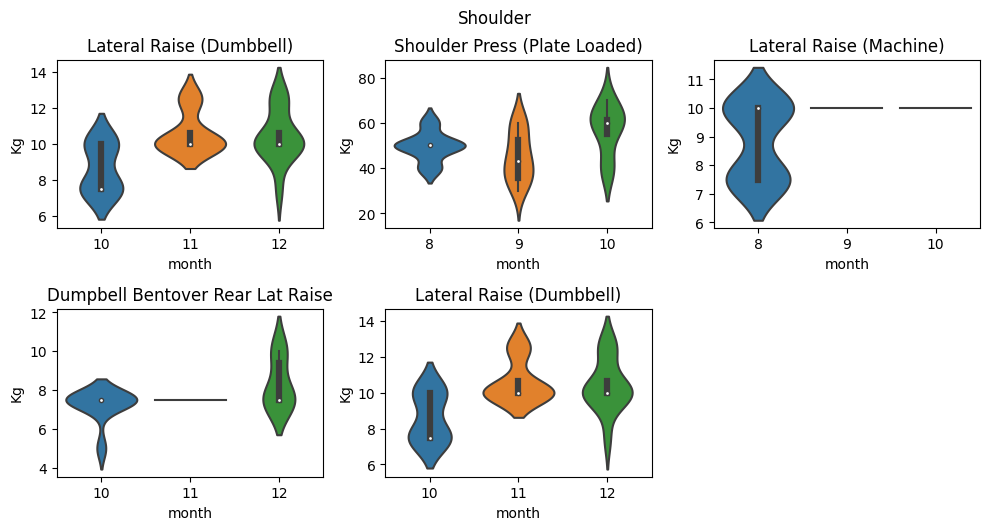

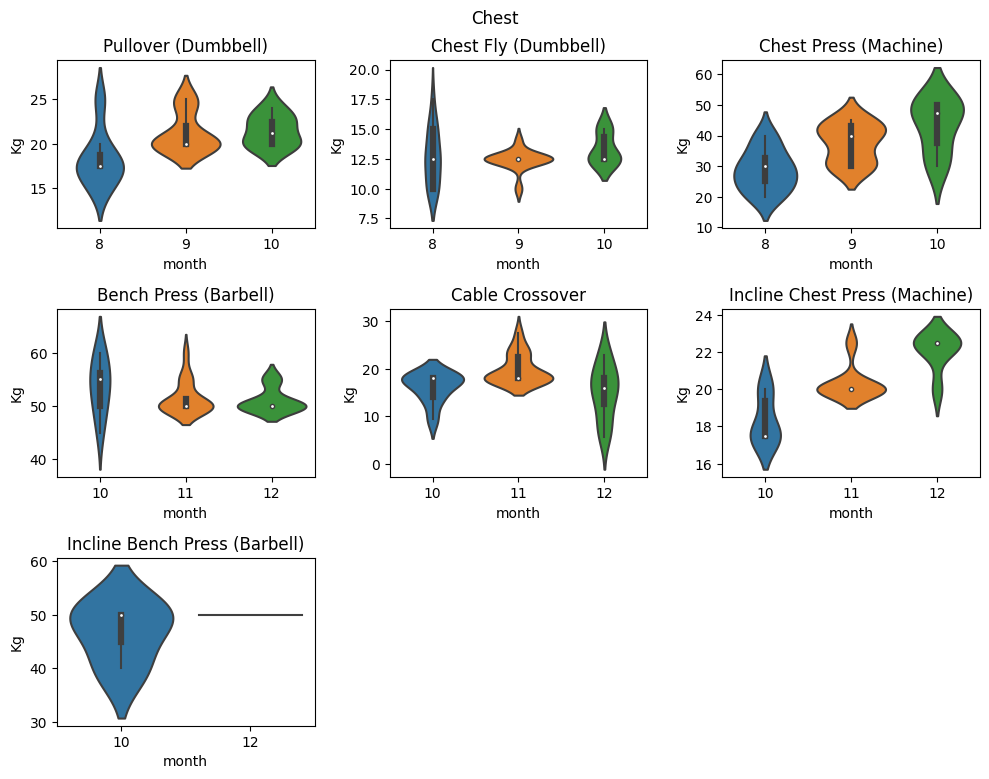

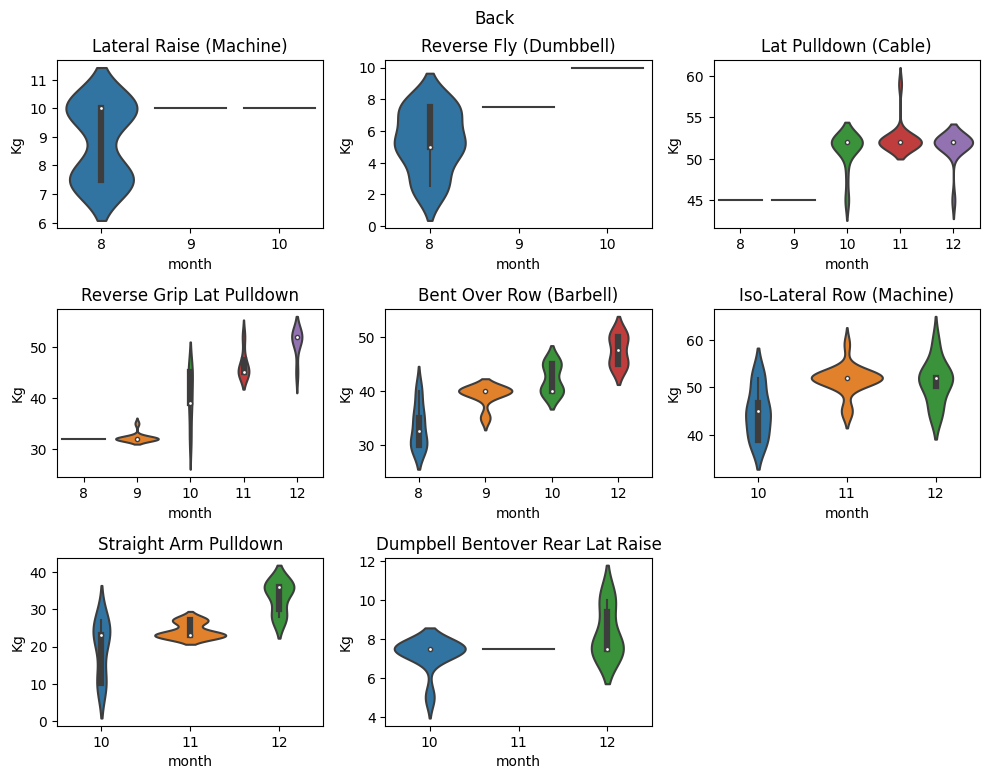

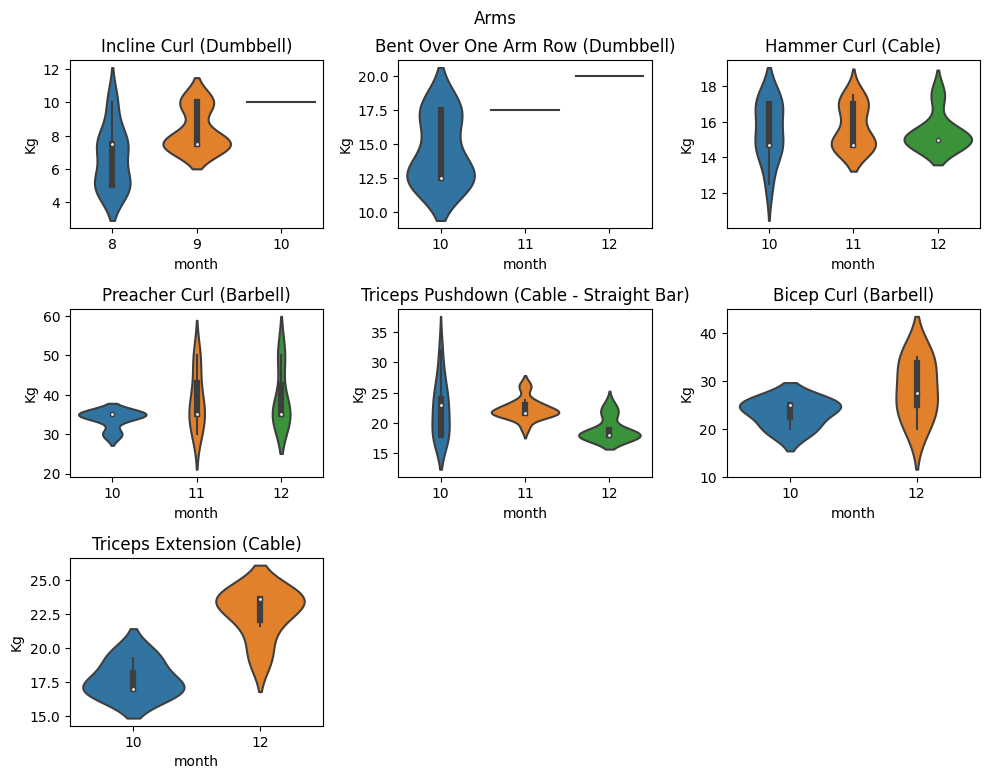

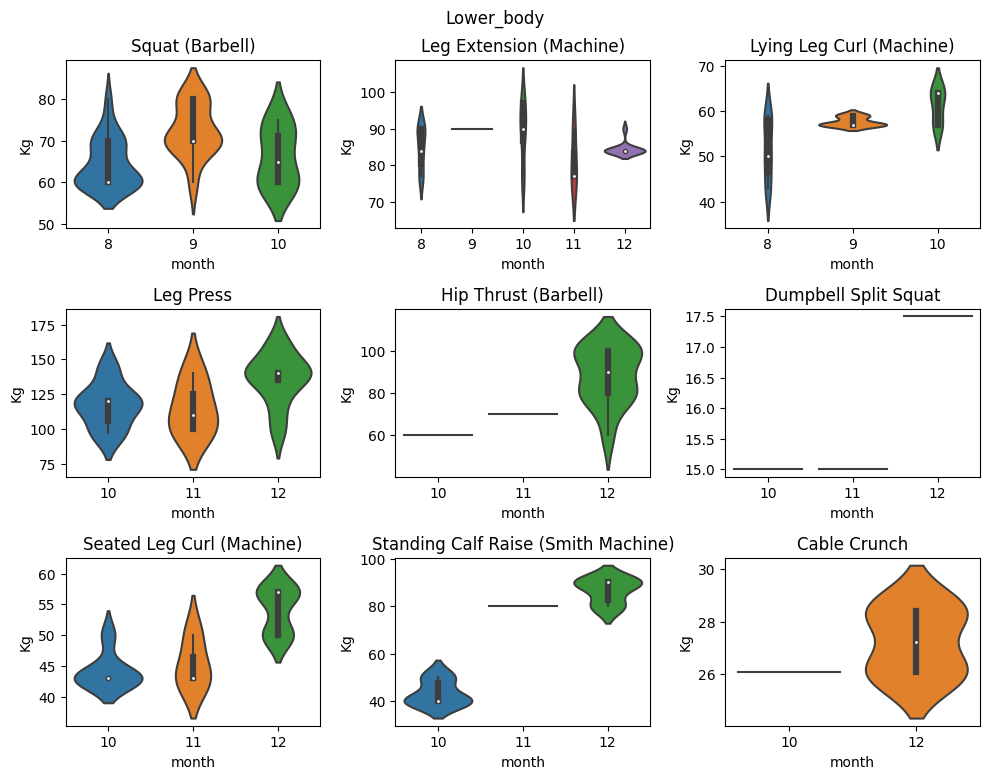

In [53]:
for group_name,moves in all_moves.items():
    f= plt.subplots(figsize=(10,10))
    for idx,ex in enumerate(moves):
        plt.subplot(4,3,idx+1)
        sns.violinplot(data=df[df.Exercise_Name.isin([ex])],x='month',y='Weight')
        plt.title(ex)
        plt.ylabel('Kg')
    plt.suptitle(group_name)
    plt.tight_layout()
    plt.savefig(f'progress_{group_name}.png')

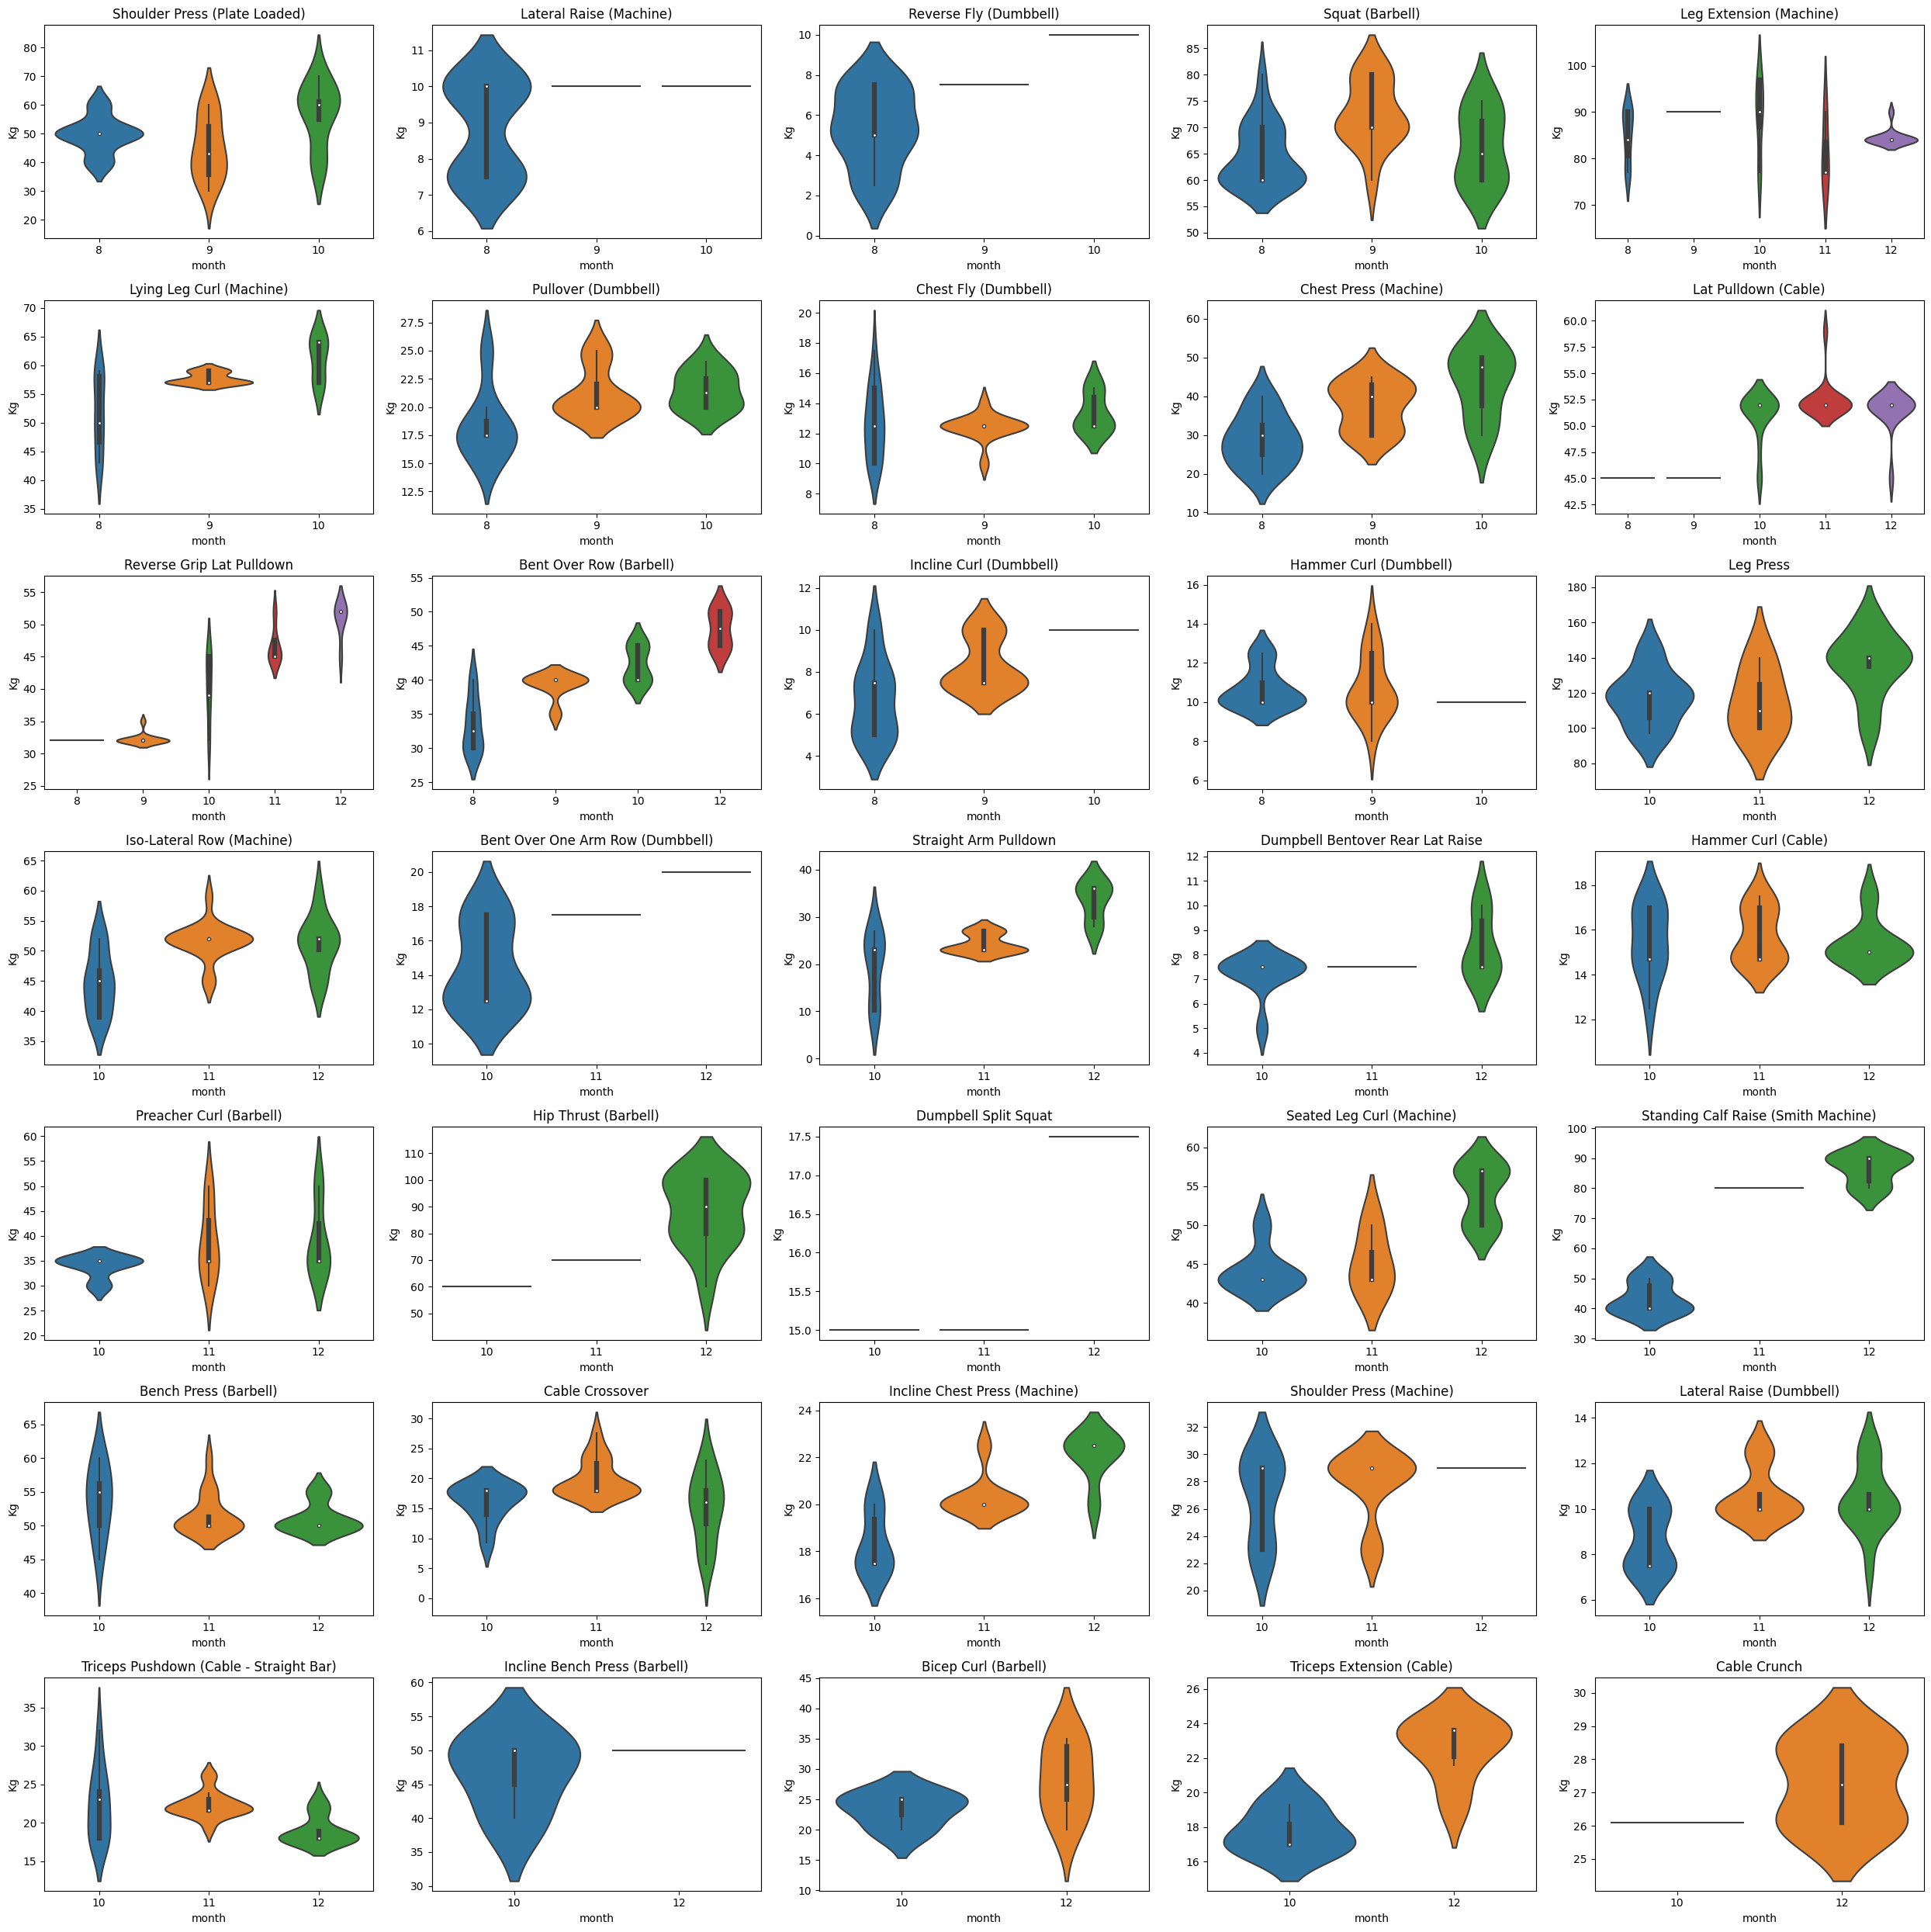

In [54]:
f= plt.subplots(figsize=(25,25))
for idx,ex in enumerate(exercise_names):
    plt.subplot(7,5,idx+1)
    sns.violinplot(data=df[df.Exercise_Name.isin([ex])],x='month',y='Weight')
    plt.title(ex)
    plt.ylabel('Kg')

plt.tight_layout()
plt.savefig('weights_per_move_per_month.png')

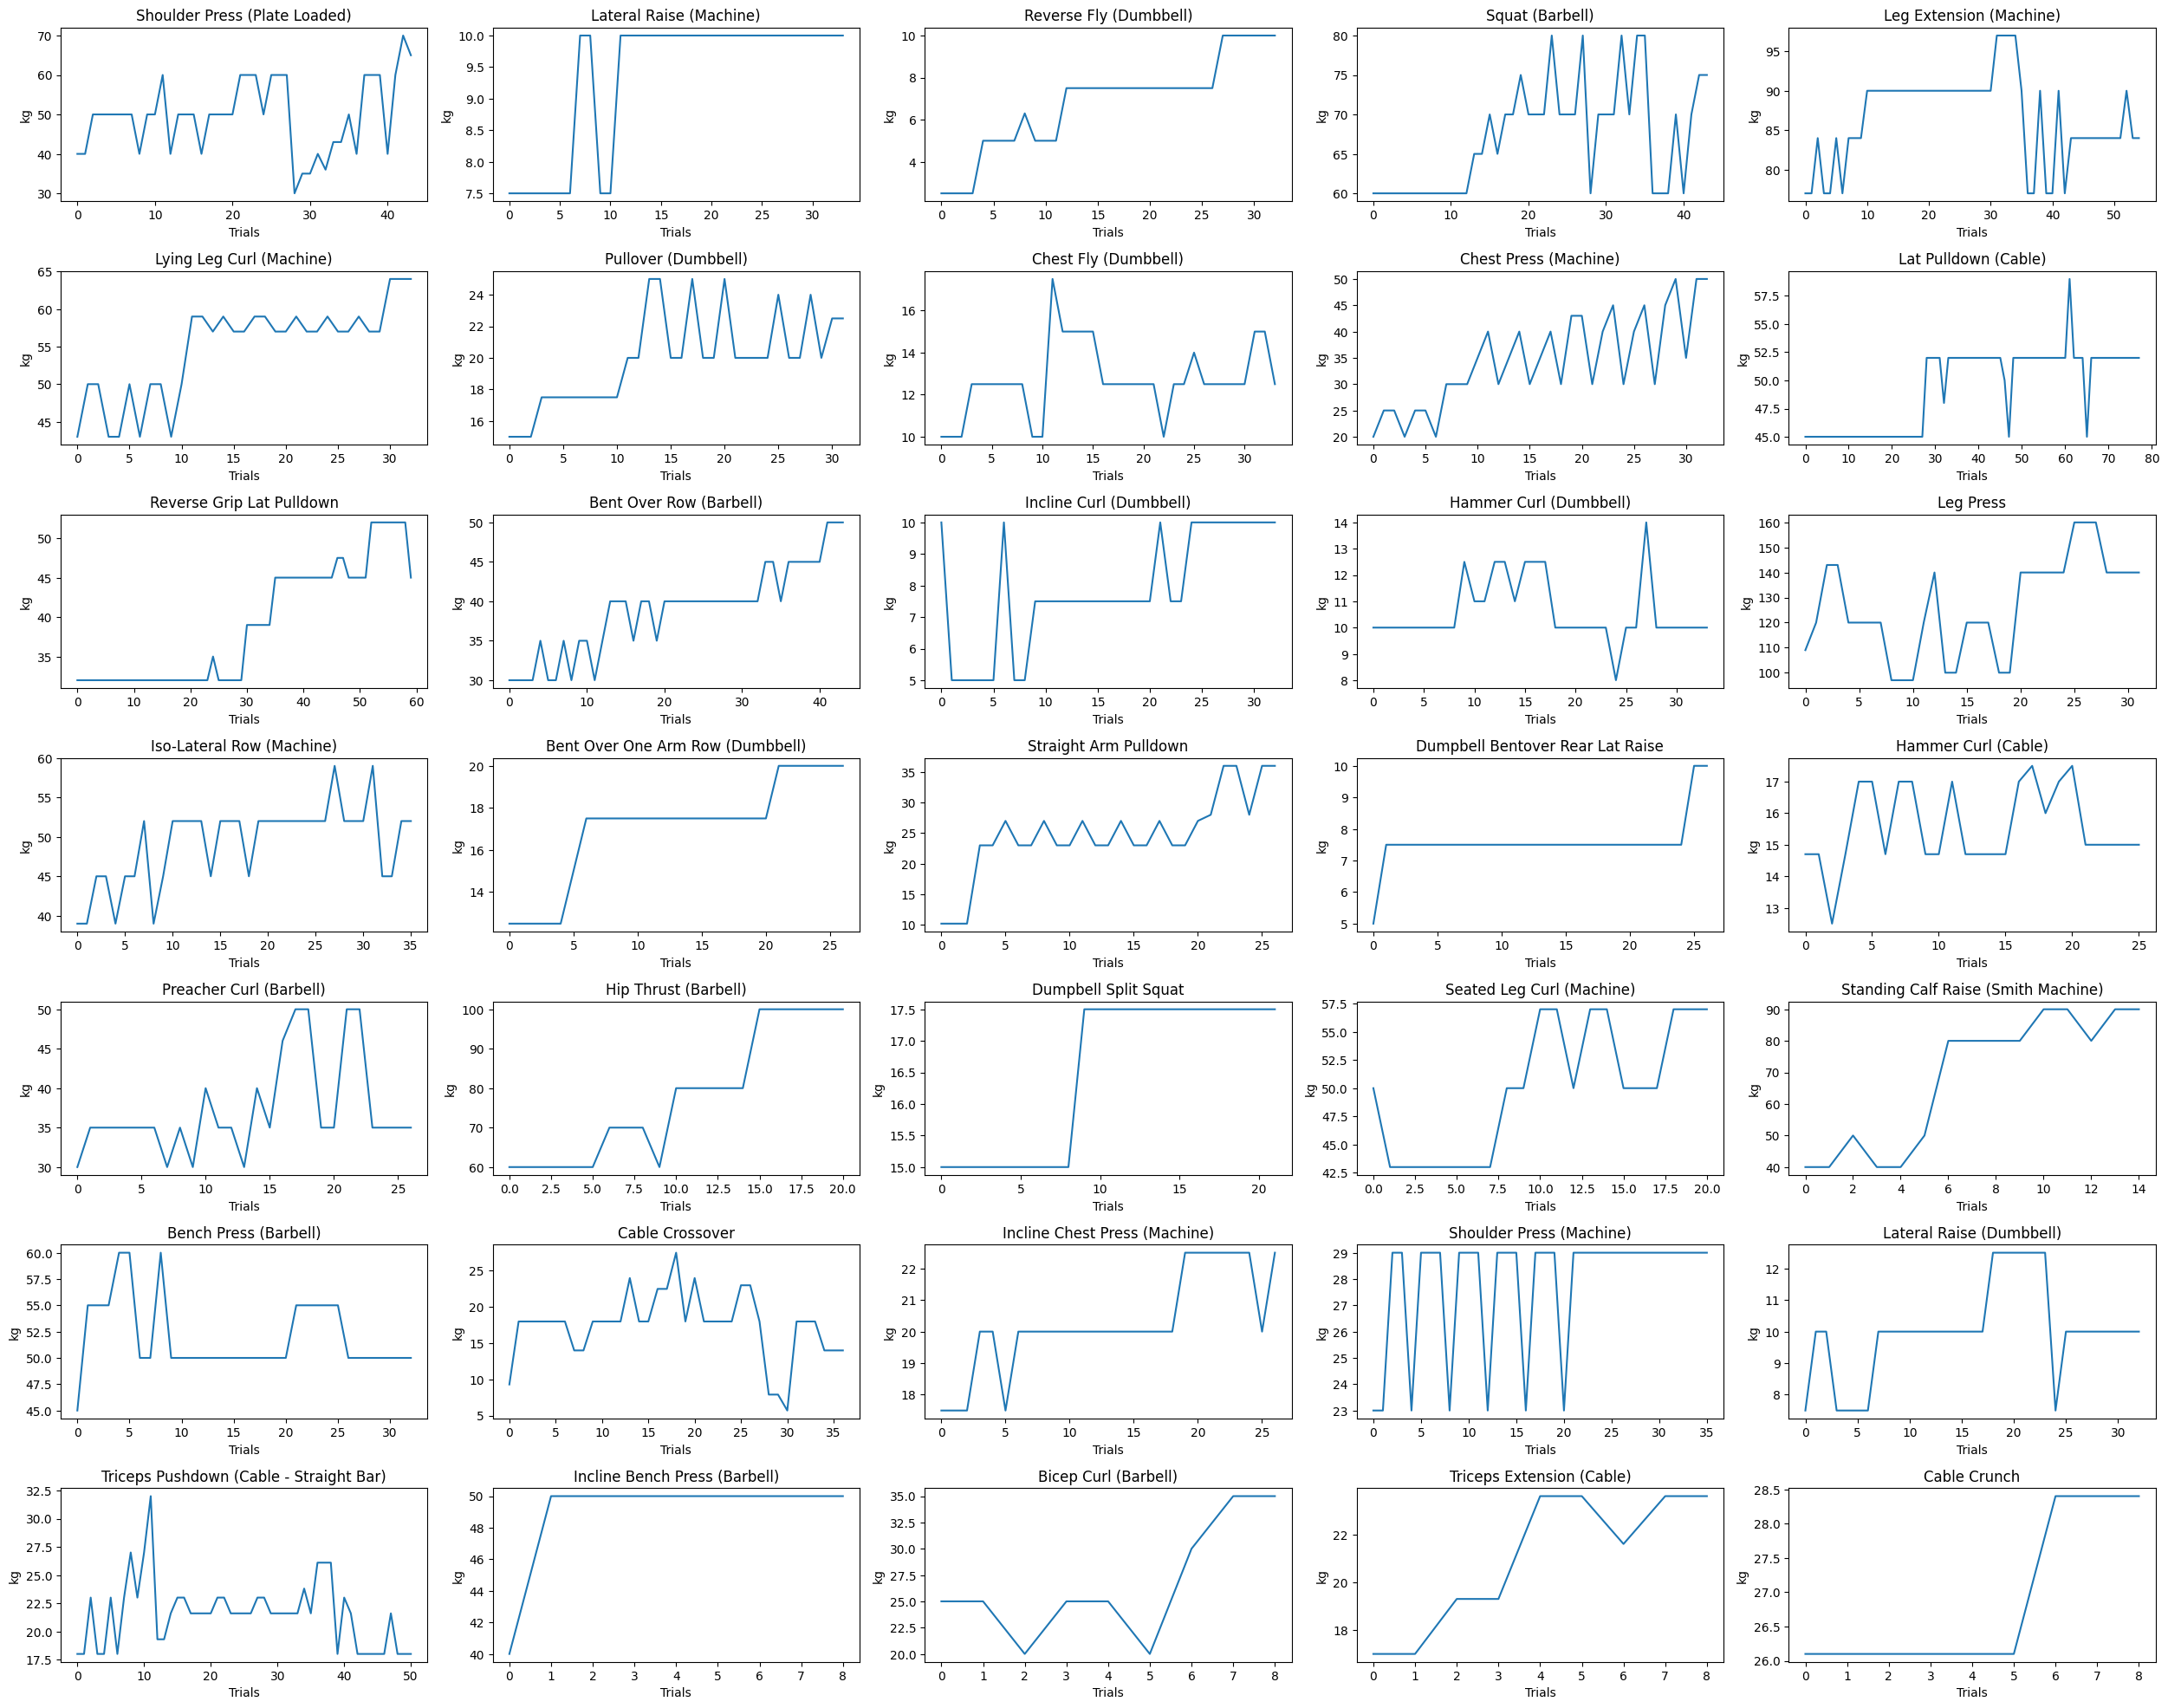

In [212]:
f= plt.subplots(figsize=(25,25))
for idx,ex in enumerate(exercise_names):
    plt.subplot(9,5,idx+1)
    df[df.Exercise_Name.isin([ex])].Weight.reset_index(drop=True).plot(title=ex)
    plt.ylabel('kg')
    plt.xlabel('Trials')

plt.tight_layout()
plt.savefig('weight_progress_raw.png')

In [55]:
df_unique = df.drop_duplicates(subset='Hour').reset_index()

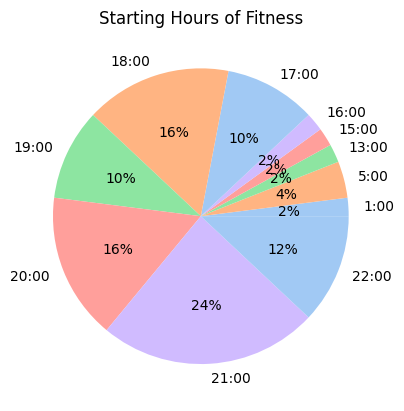

In [56]:
#colors = sns.color_palette('pastel')[0:5]
labels,data = np.unique(df.drop_duplicates(subset='Hour')['hour_main'],return_counts=True)
#create pie chart
labels = [str(i)+':00' for i in labels]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels,colors=colors, autopct='%.0f%%')
plt.title('Starting Hours of Fitness')
plt.savefig('fitness_hours.png')

In [64]:
duration_mins = []
for i in df.Duration:
    if 'h' not in i:
        i = int(i.strip('m'))
        duration_mins.append(i)
        continue
    elif 'm' not in i:
        i = 60*int(i.strip('h'))
        duration_mins.append(i)
        continue
    else:
        hr,minute = i.split(' ')
        hr,minute = int(hr[:-1]),int(minute[:-1])
        hr_to_min = hr*60
        minute += hr_to_min
        duration_mins.append(minute)
        
df['Duration_mins']=duration_mins

In [65]:
duration_mins_unq = []
for i in df_unique.Duration:
    if 'h' not in i:
        i = int(i.strip('m'))
        duration_mins_unq.append(i)
        continue
    elif 'm' not in i:
        i = 60*int(i.strip('h'))
        duration_mins_unq.append(i)
        continue
    else:
        hr,minute = i.split(' ')
        hr,minute = int(hr[:-1]),int(minute[:-1])
        hr_to_min = hr*60
        minute += hr_to_min
        duration_mins_unq.append(minute)
        
df_unique['Duration_mins']=duration_mins_unq

<AxesSubplot:>

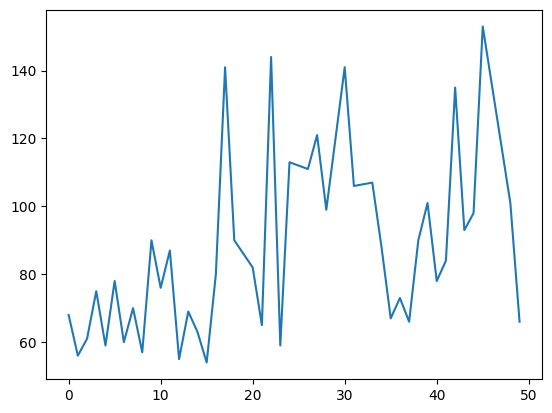

In [66]:
df2 = df_unique[df_unique.Duration_mins<200].Duration_mins
df2.plot()

In [73]:
df2.sum()/60

63.833333333333336

In [82]:
df2.mean()

87.04545454545455

In [56]:
np.unique(pd.cut(df2,3).values)

array([Interval(53.901, 87.0, closed='right'),
       Interval(87.0, 120.0, closed='right'),
       Interval(120.0, 153.0, closed='right')], dtype=object)

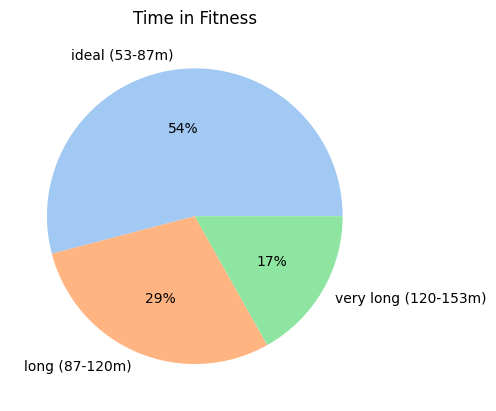

In [63]:
#colors = sns.color_palette('pastel')[0:5]
labels,data = np.unique(pd.cut(df2,3,labels=["ideal (53-87m)", "long (87-120m)", "very long (120-153m)"]),return_counts=True)
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Time in Fitness')
plt.savefig('fitness_duration.png')

In [89]:
lower_body

['Squat (Barbell)',
 'Leg Extension (Machine)',
 'Lying Leg Curl (Machine)',
 'Leg Press',
 'Hip Thrust (Barbell)',
 'Dumpbell Split Squat',
 'Seated Leg Curl (Machine)',
 'Standing Calf Raise (Smith Machine)',
 'Cable Crunch']

In [96]:
df_unique[df_unique.Exercise_Name.isin(lower_body)].reset_index(drop=True)

,index,Day,Hour,Duration,Set_Order,Exercise_Name,Weight,Reps,RPE,Seconds,Notes,Date,hour_main,month,Duration_mins
0,661,2022-10-13,21:29:47,59m,1,Leg Press,120.0,8,8.0,0,8-8-12-15,2022-10-13 21:29:47,21,10,59
1,814,2022-10-25,20:49:07,1h 39m,1,Leg Press,97.0,8,8.0,0,NaN,2022-10-25 20:49:07,20,10,99
2,923,2022-11-07,22:20:28,68h 30m,1,Leg Press,140.0,8,8.0,0,NaN,2022-11-07 22:20:28,22,11,4110
3,1119,2022-12-02,18:51:00,1h 18m,1,Leg Press,120.0,8,8.0,0,NaN,2022-12-02 18:51:00,18,12,78
4,1193,2022-12-07,18:38:28,1h 33m,1,Leg Press,140.0,8,8.0,0,NaN,2022-12-07 18:38:28,18,12,93
5,1275,2022-12-13,21:45:41,91h 2m,1,Leg Press,140.0,8,8.0,0,NaN,2022-12-13 21:45:41,21,12,5462
6,1346,2022-12-20,22:19:54,1h 6m,1,Leg Press,140.0,8,8.0,0,NaN,2022-12-20 22:19:54,22,12,66


In [87]:
df_unique.groupby(['Day','Exercise_Name']).size().to_frame()

,,0
Day,Exercise_Name,
2022-08-09,Shoulder Press (Plate Loaded),1
2022-08-11,Pullover (Dumbbell),1
2022-08-12,Shoulder Press (Plate Loaded),1
2022-08-15,Pullover (Dumbbell),1
2022-08-16,Shoulder Press (Plate Loaded),1
2022-08-18,Pullover (Dumbbell),1
2022-08-19,Shoulder Press (Plate Loaded),1
2022-08-22,Pullover (Dumbbell),1
2022-08-23,Shoulder Press (Plate Loaded),1


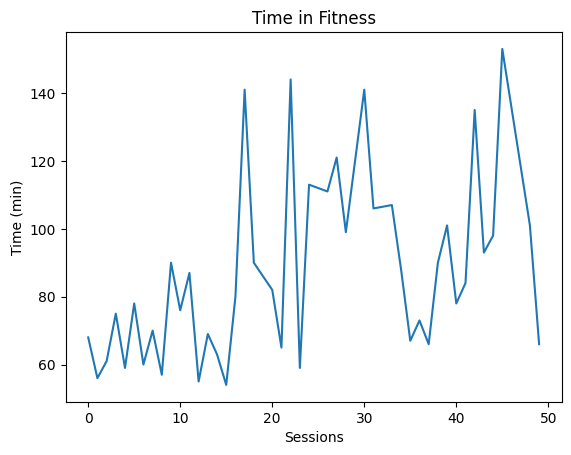

In [76]:
#colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.plot(df_unique[df_unique.Duration_mins<200].Duration_mins)
plt.title('Time in Fitness')
plt.ylabel('Time (min)')
plt.xlabel('Sessions')
plt.savefig('fitness_duration_progress.png')